* The simplest deep networks are called **multilayer perceptrons** and they consists of multiple layers of neurons each fully connected to those in the layer wich they receive input and those which they, in turn influence.

## 1.1 Multilayer Perceptrons

In [4]:
!pip install d2l --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 12.0 MB/s eta 0:00:00


In [5]:
%matplotlib inline
import torch
from d2l import torch as d2l


## 1.1.1 Hidden Layers

## Limitation of Linear Models

* Linear models assume **monotonic relationship** between features and outputs i.e increasing a feature always increases or decreases the prediction.
* While this can make sence in common cases like higher income increases loan repayment likelihood, real-world relationships are often **non-linear** such diminishing returns.
* Simple transformation e.g logistic functions i.e  can sometimes make linearity more reasonable.
* However, many problems violate monotonicity outright.
* For example, health risk increases both when body temperature is too high or low,which requires feature engineeing to handle.
* Linear models fail badly in complex problems like image classification,where importance of a pixel depends on its context.
* Brightening a single pixel does not consistently indicate class membership, and simple preprocessing cannot capture such interaction.
* To address these limitations, more powerful methods are needed.
* Deep neural networks stand out by learning both feature representations and liear decisions functions jointly from data, enabling them to model complex, context depedent relationships which linear models are incapable of

## Incorporating Hidden Layers.

* We can overcome the limitations of linear models by incorporating one or more hidden layers.
* By doing this we form a **multilayer perceptron (MLP)**.
* An MLP is built by stacking fully connected layers, where each layer feeds into the next until the final outputs are produced.
* The **L-1** layers learn a **representation** of the data, while the final layer acts as a **linear predictor**.
* In a typical MLP, all layers are fully connected, meaning every neuron in one layer influences every neuron in the next.
* For example, an MLP with four inputs, one hidden layer of five units, and three outputs has two computational layers (hidden and output), since the input layer performs no computation. However, simply stacking linear layers is not sufficient on its own, there is still more required to fully overcome the limitations of linear models.


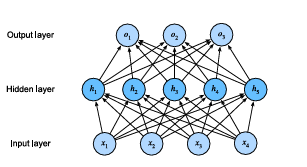

In [6]:
from PIL import Image

# Load and display in one go
img = Image.open('mlp.png')
display(img)

## From Linear to NonLinear

* Adding a hidden layer to a model does not automatically make it powerful.
* If both the hidden and output layers use only affine(linear + bias) transformations,entire network is equivalent to a **single linear model** because the **affine** function composed with another affine function is still affine.
* Thus without additioal changes a multilayer structure gains no expressive power over a standard linear model.

* The key ingredient that enables multilayer networks to model complex relationships is the introduction of a **nonlinear activation function** applied after the affine transformation in each hidden layer.
* Common choices used as activation functions include functions like *ReLU*, which operates elementwise on the hidden units.

* Having nonliear activations in place, the model can no longer be collapsed into a single layer transformation.
* Each hidden layer learns a nonlinear representation of the data, allowing the network to capture complex,nonlinear patterns.
* By stacking multiple such nonlinear hidden layers, we obtain increasingly expressive MLPs capable of modelling relationships far beyond what linear modelscan represent.
* By introducing a nonlinear activation, each layer can transform its inputs in complex, non-additive ways. This allowes the network to learn hierarchial and nonlinear patterns, rather than just repeating the same linear mapping.

# Why Nonlinear Activation Functions Are Necessary

## 1. Stacking Affine Layers Provides No Extra Power
An affine layer is defined as:
$f(x) = Wx + b$

Consider a two-layer network **without** nonlinear activation:
$$h = W^{(1)}x + b^{(1)}$$
$$y = W^{(2)}h + b^{(2)}$$

Substituting $h$ into the second equation:
$$y = W^{(2)}(W^{(1)}x + b^{(1)}) + b^{(2)}$$
$$y = (W^{(2)}W^{(1)})x + (W^{(2)}b^{(1)} + b^{(2)})$$

By defining $W' = W^{(2)}W^{(1)}$ and $b' = W^{(2)}b^{(1)} + b^{(2)}$, the network simplifies to:
$$y = W'x + b'$$

**Conclusion:** Stacking affine layers results in a single affine transformation. Depth without nonlinearity adds **no expressive power**.



---

## 2. Introducing Nonlinear Activation
Insert a nonlinear activation function $\sigma(\cdot)$:
$$h = \sigma(W^{(1)}x + b^{(1)})$$
$$y = W^{(2)}h + b^{(2)}$$

Substituting results in:
$$y = W^{(2)}\sigma(W^{(1)}x + b^{(1)}) + b^{(2)}$$

Because $\sigma$ is nonlinear, there is no single pair of $(W, b)$ that satisfies this equation for all $x$. This prevents the network from "collapsing" into a simple linear model.



## 2 Activation functions

* Activation functions decide whether a neuron should activated or not by calculating the weighted sum and further adding bias to it.

## 2.1 ReLU

* The ReLU functions refers to **Rectified Linear Unit**.
* It provides a very simple nonlinear transformation.
* Given sn element $x$, the function is defined as the maximum of the element and 0:
  $$\sigma(x) = \max(0, x)$$

* The ReLU function retains only positive elements and discards all negative elements by setting the corresponding activations to 0.


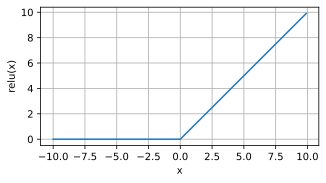

In [8]:
##plotting the ReLU function
x = torch.arange(-10.0,10.0,0.1,requires_grad=True)
y =torch.relu(x)
d2l.plot(x.detach(),y.detach(),'x','relu(x)',figsize=(5,2.5))

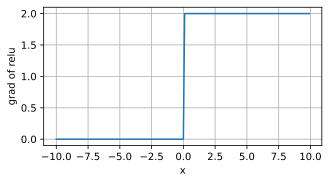

In [10]:
##plotting the derivative of relu function
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of relu',figsize=(5,2.5))

* The reason for using ReLU is that its derivatives are particulary well behaved either way they vanish or they just let the argument through.
* This makes optimization better behaved and it mitigated the well-documentend problem of vanishing gradients that caused problems in previous versions of neural networks.

## 2.2 Sigmoid Function

* The **sigmoid function** transforms its inputs whose values lie in the domain $\mathbb{R}$, to outputs that lie on the interval of (0,1).
* For this reason this function is often called **squashing fuunction** since it squashes any input in the range (-inf,inf) to some value in the range (0,1).
  $ \sigma(x) = \frac{1}{1 + e^{-x}} $

* Sigmoids are still widely sued as activation functions on the output units when we want to interpret the outputs as probabilities for binary classification problems.
* However sigmoids have been replaced with easily trainable ReLU for most use in hidden layers, since sigmoid poses challenges for optimization since gradient vanishes (becomes extremely small) for large positive and negative arguments.

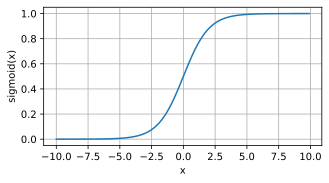

In [17]:
##plotting the sigmoid function
x = torch.arange(-10,10,0.1,requires_grad=True)
y = torch.sigmoid(x)
d2l.plot(x.detach(),y.detach(),'x','sigmoid(x)',figsize=(5,2.5))

* The derivative of the sigmoid function is given by the following equation:
  $$ \frac{d}{dx} \sigma(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \sigma(x) (1 - \sigma(x)) $$

* The derivative of the sigmoid function is plotted below.
* Note that when the input is 0, the derivative of the sigmoid function reaches a maximum of 0.25.
* As the input diverges from the 0 in either direction, the derivative approaches zero.

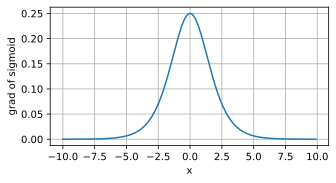

In [21]:
#clearing out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of sigmoid',figsize=(5,2.5))

## 2.3 Tanh Function

* Like the sigmoid the tanh (hyperbolic fuction) also squashes its inputs, transforming them into elements on the interval between -1 and 1.
  $\tanh(x) = \frac{1 - e^{-2x}}{1 + e^{-2x}}$

* Here we plot the tanh function below.
* Note that as input nears 0, tanh function approaches a linear transformation.

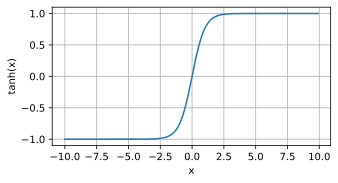

In [22]:
##plotting the tanh function
y = torch.tanh(x)
d2l.plot(x.detach(),y.detach(),'x','tanh(x)',figsize=(5,2.5))

* The derivative of the tanh function is:
   $\frac{d}{dx} \tanh(x) = 1 - \tanh^2(x)$

* Below we plot the derivative and as the input nears 0, the derivative of the tanh function approaches a maximum of 1.

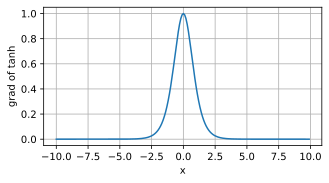

In [24]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

## Pratice problems

1. Compute the derivative of the pReLU activation function

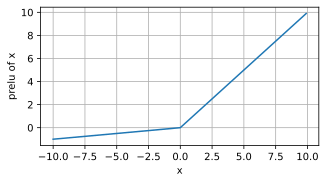

In [26]:
y =torch.prelu(x, torch.tensor(0.1))
d2l.plot(x.detach(),y.detach(),'x','prelu of x',figsize=(5,2.5))

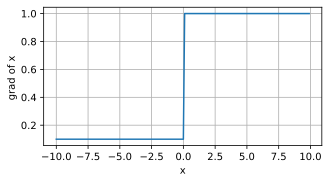

In [27]:
##derivative
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of x ',figsize=(5,2.5))

2. Compute the derivative of the Swish activation function

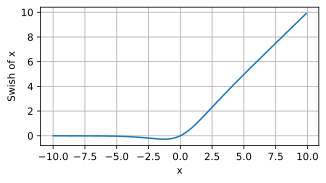

In [30]:
import torch.nn.functional as F
y = F.silu(x)
d2l.plot(x.detach(),y.detach(),'x','Swish of x',figsize=(5,2.5))

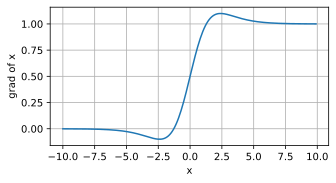

In [32]:
##plotting its the derivative of Swish activation
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of x',figsize=(5,2.5))